In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

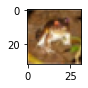

In [6]:
plt.figure(figsize=(15,1))
plt.imshow(X_train[0])

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)

In [9]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
model = keras.Sequential([
          keras.layers.Flatten(input_shape=(32,32,3)),
          keras.layers.Dense(3000, activation='relu'),
          keras.layers.Dense(1000, activation='relu'),
          keras.layers.Dense(10, activation='sigmoid'),
])

model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.7451 - accuracy: 0.3827
Epoch 2/5
1563/1563 [==============================] - 132s 85ms/step - loss: 1.6031 - accuracy: 0.4354
Epoch 3/5
1563/1563 [==============================] - 119s 76ms/step - loss: 1.5246 - accuracy: 0.4621
Epoch 4/5
1563/1563 [==============================] - 130s 83ms/step - loss: 1.4675 - accuracy: 0.4843
Epoch 5/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4184 - accuracy: 0.4998


In [15]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.56      0.53      0.55      1000
           1       0.59      0.66      0.62      1000
           2       0.38      0.34      0.36      1000
           3       0.37      0.28      0.32      1000
           4       0.46      0.35      0.40      1000
           5       0.43      0.33      0.37      1000
           6       0.36      0.81      0.50      1000
           7       0.67      0.45      0.53      1000
           8       0.55      0.70      0.62      1000
           9       0.65      0.37      0.48      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [16]:
cnn = keras.Sequential([

          #cnn
          layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3),activation='relu'),
          layers.MaxPooling2D((2,2)),

          layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
          layers.MaxPooling2D((2,2)),
                   
          #Dense
          keras.layers.Flatten(),
          keras.layers.Dense(64, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
cnn.fit(X_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4815 - accuracy: 0.4649
Epoch 2/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.1215 - accuracy: 0.6082
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9987 - accuracy: 0.6543
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9177 - accuracy: 0.6819
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8581 - accuracy: 0.7018
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8023 - accuracy: 0.7222
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7562 - accuracy: 0.7373
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7143 - accuracy: 0.7504
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6697 - accuracy: 0.7673
Epoch 10/10
1563/1563 [==============================] - 63s 40m

In [18]:
#cnn accuracy

y_predicted = cnn.predict(X_test)
y_predicted_cnn = [np.argmax(element) for element in y_predicted]

print(classification_report(y_test,y_predicted_cnn))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1000
           1       0.78      0.85      0.81      1000
           2       0.58      0.55      0.57      1000
           3       0.65      0.38      0.48      1000
           4       0.56      0.72      0.63      1000
           5       0.67      0.58      0.62      1000
           6       0.78      0.76      0.77      1000
           7       0.66      0.81      0.72      1000
           8       0.81      0.80      0.81      1000
           9       0.77      0.78      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

